In [94]:
import numpy as np
import pandas as pd
from seqeval.metrics import accuracy_score
import torch.nn as nn
from tqdm import tqdm, trange
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig
from sklearn.model_selection import train_test_split
import re
from transformers import get_linear_schedule_with_warmup
from transformers import DataCollatorForTokenClassification
from transformers import BertForTokenClassification, AdamW
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score,classification_report
from concurrent.futures import ThreadPoolExecutor
from keras_preprocessing.sequence import pad_sequences
from modules.NER_functions import *

In [81]:
model.tag_values

['B-Mood',
 'O',
 'B-Drug',
 'I-Procedure',
 'B-Condition',
 'B-Person',
 'I-Condition',
 'B-Procedure',
 'B-Observation',
 'I-Drug',
 'I-Observation',
 'I-Person',
 'I-Mood',
 'PAD']

In [82]:
df_train = pd.read_csv('./data/train.csv')
df = pd.read_csv('../data/clini_data.csv')

/tmp/ipykernel_30351/2479533425.py:2: DtypeWarning: Columns (2,3,4,5,10,11,12,13,14,15,17,18,19,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,42,43,68,79,80,81,82,88,89,94,95,97,98,99,100,101,102,104,105,109,110,111,112,113,114,115,116,118,121,122,151,163,169,184,192,193,194,195,196,200,206,209,210,212,213,214,215,216,217,218,219,220,222,223,225,226,228,229,230,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,262,263,264,265,266,275,279,280,282,283,284,285,286,287,300,301,302,303,304,308,320,321,322,324,325,326) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/clini_data.csv')


In [83]:
getter = SentenceGetter(df_train)

In [84]:
sentences = [[word[0] for word in sentence] for sentence in getter.sentences]
sentences[0]

['With',
 'severe',
 'comorbidities',
 ',',
 'such',
 'as',
 'cardiovascular',
 'disease',
 ',',
 'chronic',
 'obstructive',
 'pulmonary',
 'disease',
 ',',
 'diabetes',
 'mellitus',
 ',',
 'and',
 'chronic',
 'renal',
 'dysfunction',
 '.']

In [85]:
labels = [[s[1] for s in sentence] for sentence in getter.sentences]
print(labels[0])

['O', 'O', 'B-Condition', 'O', 'O', 'O', 'B-Condition', 'I-Condition', 'O', 'B-Condition', 'I-Condition', 'I-Condition', 'I-Condition', 'O', 'B-Condition', 'I-Condition', 'O', 'O', 'B-Condition', 'I-Condition', 'I-Condition', 'O']


In [86]:
tag_values = list(set(df_train["Label"].values))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}
tag2idx

{'B-Mood': 0,
 'O': 1,
 'B-Drug': 2,
 'I-Procedure': 3,
 'B-Condition': 4,
 'B-Person': 5,
 'I-Condition': 6,
 'B-Procedure': 7,
 'B-Observation': 8,
 'I-Drug': 9,
 'I-Observation': 10,
 'I-Person': 11,
 'I-Mood': 12,
 'PAD': 13}

In [87]:
model = Bert_Model(sentences=sentences, labels=labels, tag_values=tag_values)

In [88]:
model.getparam(100)

In [89]:
model.preprocess()

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/onyxia/work/.venv/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [90]:
model.train_eval(epochs=5,weight=[1]*len(tag2idx))

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Average train loss: 0.1965192212693153
Validation loss: 0.10314302723253926
Validation Accuracy: 0.8311344189897875
Validation F1-Score: 0.8546330886489172


/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/pytho

Classification Report:
                precision    recall  f1-score   support

  B-Condition       0.76      0.73      0.74      1729
       B-Drug       0.75      0.83      0.79       713
       B-Mood       0.00      0.00      0.00        42
B-Observation       0.00      0.00      0.00       210
     B-Person       0.85      0.24      0.37       169
  B-Procedure       0.65      0.43      0.52       507
  I-Condition       0.83      0.57      0.68      1457
       I-Drug       0.58      0.56      0.57       335
       I-Mood       0.00      0.00      0.00        26
I-Observation       0.00      0.00      0.00       242
     I-Person       0.00      0.00      0.00        27
  I-Procedure       0.83      0.34      0.48       501
            O       0.86      0.97      0.91     12157
          PAD       0.00      0.00      0.00         0

     accuracy                           0.83     18115
    macro avg       0.44      0.33      0.36     18115
 weighted avg       0.80      0.83     

Epoch:  20%|██        | 1/5 [55:39<3:42:37, 3339.36s/it]

Model saved successfully.
Average train loss: 0.0885940132442341
Validation loss: 0.08666842731256638
Validation Accuracy: 0.8560309136075076
Validation F1-Score: 0.8666566115952643


/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                precision    recall  f1-score   support

  B-Condition       0.75      0.83      0.79      1729
       B-Drug       0.79      0.85      0.82       713
       B-Mood       0.25      0.07      0.11        42
B-Observation       0.60      0.15      0.24       210
     B-Person       0.78      0.55      0.64       169
  B-Procedure       0.64      0.69      0.66       507
  I-Condition       0.78      0.71      0.75      1457
       I-Drug       0.64      0.73      0.68       335
       I-Mood       0.00      0.00      0.00        26
I-Observation       0.42      0.05      0.08       242
     I-Person       0.00      0.00      0.00        27
  I-Procedure       0.77      0.55      0.64       501
            O       0.91      0.94      0.92     12157

     accuracy                           0.86     18115
    macro avg       0.56      0.47      0.49     18115
 weighted avg       0.84      0.86      0.85     18115




Epoch:  40%|████      | 2/5 [1:46:46<2:38:57, 3179.06s/it]

Model saved successfully.
Average train loss: 0.06928484749356051
Validation loss: 0.08951252518642333
Validation Accuracy: 0.8545404361026774
Validation F1-Score: 0.8635066138464488


/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch:  60%|██████    | 3

Classification Report:
                precision    recall  f1-score   support

  B-Condition       0.74      0.83      0.78      1729
       B-Drug       0.84      0.82      0.83       713
       B-Mood       0.25      0.12      0.16        42
B-Observation       0.58      0.14      0.22       210
     B-Person       0.79      0.59      0.67       169
  B-Procedure       0.68      0.63      0.66       507
  I-Condition       0.70      0.78      0.74      1457
       I-Drug       0.65      0.70      0.68       335
       I-Mood       0.43      0.12      0.18        26
I-Observation       0.31      0.06      0.10       242
     I-Person       0.00      0.00      0.00        27
  I-Procedure       0.77      0.55      0.64       501
            O       0.91      0.93      0.92     12157

     accuracy                           0.85     18115
    macro avg       0.59      0.48      0.51     18115
 weighted avg       0.84      0.85      0.85     18115


Average train loss: 0.056706270109528

/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch:  80%|████████  | 4

Classification Report:
                precision    recall  f1-score   support

  B-Condition       0.77      0.82      0.80      1729
       B-Drug       0.82      0.86      0.84       713
       B-Mood       0.26      0.14      0.18        42
B-Observation       0.49      0.20      0.28       210
     B-Person       0.72      0.67      0.70       169
  B-Procedure       0.70      0.65      0.67       507
  I-Condition       0.72      0.78      0.75      1457
       I-Drug       0.66      0.78      0.71       335
       I-Mood       0.36      0.15      0.22        26
I-Observation       0.25      0.16      0.19       242
     I-Person       0.00      0.00      0.00        27
  I-Procedure       0.73      0.65      0.69       501
            O       0.92      0.93      0.93     12157

     accuracy                           0.86     18115
    macro avg       0.57      0.52      0.54     18115
 weighted avg       0.85      0.86      0.85     18115


Average train loss: 0.047982645047891

/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch: 100%|██████████| 5

Classification Report:
                precision    recall  f1-score   support

  B-Condition       0.79      0.81      0.80      1729
       B-Drug       0.84      0.84      0.84       713
       B-Mood       0.27      0.14      0.19        42
B-Observation       0.49      0.19      0.27       210
     B-Person       0.73      0.68      0.70       169
  B-Procedure       0.68      0.68      0.68       507
  I-Condition       0.75      0.75      0.75      1457
       I-Drug       0.66      0.75      0.70       335
       I-Mood       0.27      0.15      0.20        26
I-Observation       0.27      0.14      0.19       242
     I-Person       0.00      0.00      0.00        27
  I-Procedure       0.74      0.65      0.69       501
            O       0.92      0.94      0.93     12157

     accuracy                           0.86     18115
    macro avg       0.57      0.52      0.53     18115
 weighted avg       0.85      0.86      0.86     18115




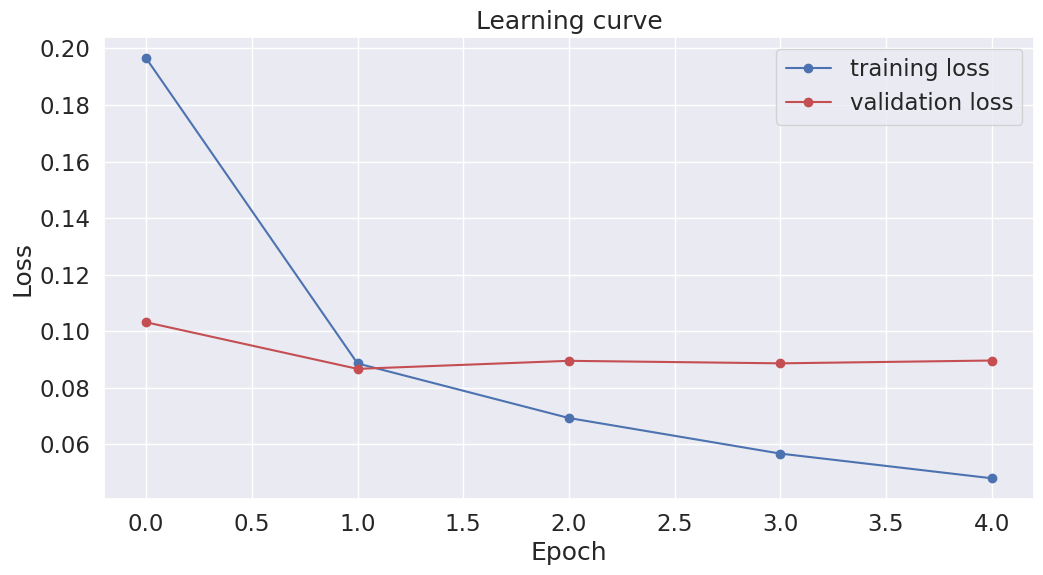

In [95]:
model.plotloss()

In [93]:
model.predict("This is a cancer")

[('this', 'O'), ('is', 'O'), ('a', 'O'), ('cancer', 'B-Condition')]